#1st Excersice: The 1st exercise focuses on the linear regresion and normal equations.
By using Ridge linear regression

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

-0.99768
-0.69574
-0.40373
-0.10236
0.22024
0.47742
0.82229

2.0885
1.1646
0.3287
0.46013
0.44808
0.10013
-0.32952

In [16]:
X = np.array([[-0.99768,-0.69574,-0.40373,-0.10236,0.22024,0.47742,0.82229],[2.0885,1.1646,0.3287,0.46013,0.44808,0.10013,-0.32952]])

In [17]:
X

array([[-0.99768, -0.69574, -0.40373, -0.10236,  0.22024,  0.47742,
         0.82229],
       [ 2.0885 ,  1.1646 ,  0.3287 ,  0.46013,  0.44808,  0.10013,
        -0.32952]])

In [20]:
init_X = np.array([-0.99768,-0.69574,-0.40373,-0.10236,0.22024,0.47742,0.82229])
y = np.array([2.0885,1.1646,0.3287,0.46013,0.44808,0.10013,-0.32952])

#generate the feature_matrix by using PolynomialFeatures

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
poly=PolynomialFeatures(degree=5)
X_features=poly.fit_transform(init_X[:,np.newaxis])

#ridge regression as set the penalty lamda as 0, 1 and 10

In [4]:
from sklearn.linear_model import Ridge

In [75]:
clf=Ridge(alpha=1)

In [76]:
clf.fit(X_features,y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [83]:
clf.coef_[0]=clf.intercept_
clf.coef_

array([ 0.3975953 , -0.42066637,  0.12959211, -0.3974739 ,  0.17525553,
       -0.33938772])

In [3]:
from numpy.linalg import norm as LA

#plot the scatter graph and ridge regression curve

In [84]:
LA(clf.coef_)

0.80976561822364812

In [62]:
regression_func = lambda x: clf.intercept_ + clf.coef_[1]*x + clf.coef_[2]*x**2 + clf.coef_[3]*x**3 + clf.coef_[4]*x**4 + clf.coef_[5]*x**5

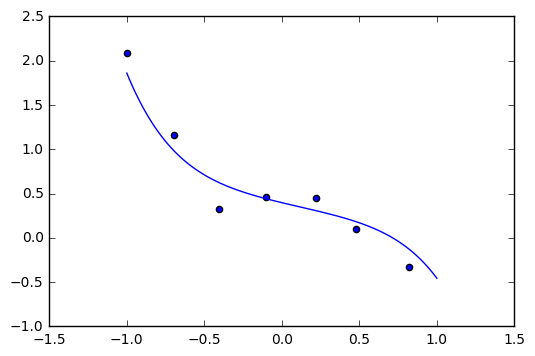

In [63]:
plt.scatter(init_X,y)
plt.plot(plot_x,regression_func(plot_x),label="regression_func")

#integrate together

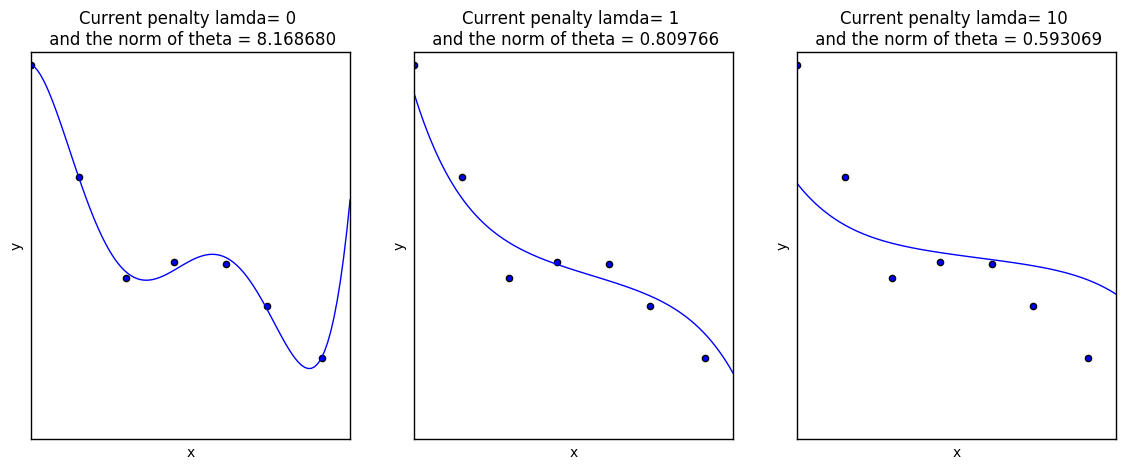

In [89]:
lamda=[0,1,10]
plt.figure(figsize=(14,5))
for i in range(len(lamda)):
    ax = plt.subplot(1,len(lamda),i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    clf=Ridge(alpha=lamda[i])
    clf.fit(X_features,y)
    
    plot_x = np.linspace(-1.0,1.0,100)
    regression_func = lambda x: clf.intercept_ + clf.coef_[1]*x + clf.coef_[2]*x**2 + clf.coef_[3]*x**3 + clf.coef_[4]*x**4 + clf.coef_[5]*x**5
    
    clf.coef_[0]=clf.intercept_
    norm_theta=LA(clf.coef_)
    
    plt.scatter(init_X,y,label="sample")
    plt.plot(plot_x,regression_func(plot_x),label="regression func")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(-1.0,1.0)
    plt.ylim(-1.0,2.2)
    plt.title("Current penalty lamda= {} \n and the norm of theta = {:f}".format(lamda[i],norm_theta))
plt.show()

#The 2nd excercise: regularized logistic regression

#Read the dat file by using pandas read_csv

In [45]:
import pandas as pd
import os

In [46]:
features_df = pd.read_csv(os.getcwd()+'\\data\\ex5Logx.dat',sep=',',names=['u','v'])
target_df = pd.read_csv(os.getcwd()+'\\data\\ex5Logy.dat',sep=',',names=['target'])

In [47]:
feature_u = features_df['u'].values
feature_v = features_df['v'].values

In [48]:
target_values = target_df.values
sample_ones = target_values[target_values==1]
sample_zeros = target_values[target_values==0]

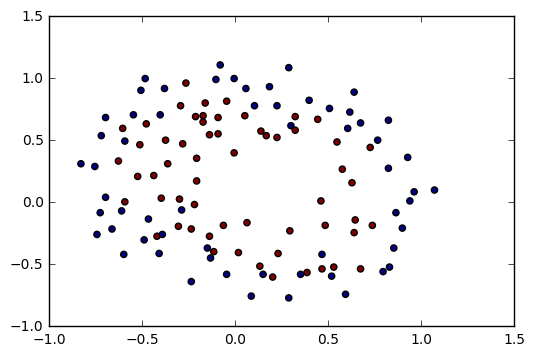

In [49]:
plt.scatter(feature_u,feature_v,c=target_values)
#plt.scatter(feature_u,feature_v,marker='+',s=sample_zeros)

#Then assign features_df's value aka feature x to all monomials(meaning poloynomial terms) of u and v to be six power by using sklearn PolynomialFeatures package

In [7]:
print (features_df.head().values)
print (features_df.values.shape)

[[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
(117L, 2L)


In [50]:
poly_transformer = PolynomialFeatures(degree=6)
transformed_x = poly_transformer.fit_transform(features_df.values)

#Now the transformed_x will be 117 * 28 matrix
# The final features vector demension is 29, where   x0=1,x1=u,x2=v,x3=u**2,x4=uv,x5=v**2,...x28=v**6

In [51]:
transformed_x.shape

(117L, 28L)

#Build the Logistics model

In [52]:
from sklearn.linear_model import LogisticRegression

#set the inverse of regularization strength C

In [66]:
C=0.01
X = transformed_x
y = target_values

In [67]:
clf_log=LogisticRegression(C=C,penalty='l2',solver='newton-cg')

In [68]:
clf_log.fit(X,y)

D:\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
clf_log.coef_.shape

(1L, 28L)

#Draw the dicision boundary

In [17]:
u = np.linspace(-1.0,1.5,200)
v = np.linspace(-1.0,1.5,200)

# TRY meshgrid

In [71]:
XX,YY = np.meshgrid(u,v)
grid_vector = np.c_[XX.ravel(),YY.ravel()]

#Transform the gird to polynominal vector

In [72]:
ploy=PolynomialFeatures(degree=6)
trasformed_grid_vector= ploy.fit_transform(grid_vector)

In [73]:
trasformed_grid_vector.shape

(40000L, 28L)

In [74]:
Z_vector = np.dot(trasformed_grid_vector,clf_log.coef_[0,:])

In [79]:
Z=Z_vector.reshape(XX.shape)
Z=Z.T

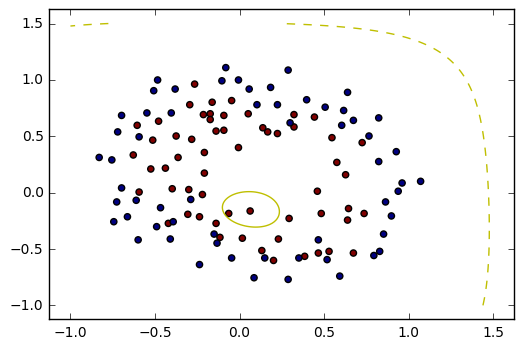

In [80]:
plt.scatter(feature_u,feature_v,c=target_values)
plt.contour(u,v,Z,levels=[-1,0,1],colors='y')
plt.show()

In [78]:
clf_log.coef_

array([[  7.14482829e-09,  -1.48469848e-02,   4.85737353e-03,
         -5.44904315e-02,  -1.31404212e-02,  -3.99820906e-02,
         -1.76313167e-02,  -7.91718196e-03,  -9.04876721e-03,
         -2.33648665e-02,  -4.33228339e-02,  -2.37558363e-03,
         -1.44034361e-02,  -3.45607258e-03,  -4.21714450e-02,
         -2.08496282e-02,  -4.79449222e-03,  -3.65561482e-03,
         -6.39741694e-03,  -5.06822864e-03,  -3.24246066e-02,
         -3.42971473e-02,  -1.09194828e-03,  -7.12345163e-03,
         -3.80338371e-04,  -8.08722210e-03,  -1.52880812e-03,
         -4.15959510e-02]])

In [90]:
def log_boundary_plot(C,features,target):
    C = C
    #dataframe data handle
    feature_u = features['u'].values
    feature_v = features['v'].values
    target_value = target.values
    
    transformer = PolynomialFeatures(degree=6)
    X = transformer.fit_transform(features.values)
    y = target_value
    
    clf = LogisticRegression(C=C,penalty='l2')
    clf.fit(X,y)
    
    #plot the decision boundary
    u = np.linspace(-1.0,1.5,200)
    v = np.linspace(-1.0,1.5,200)
    
    XX,YY = np.meshgrid(u,v)
    grid = np.c_[XX.ravel(),YY.ravel()]
    
    poly = PolynomialFeatures(degree=6)
    transformed_grid = poly.fit_transform(grid)
    
    P_vector = np.dot(transformed_grid, clf.coef_[0,:])
    P = P_vector.reshape(XX.shape)
    
    plt.scatter(feature_u,feature_v,c=target_value)
    plt.contour(u,v,P,levels=[-1,0,1],colors='y')
    plt.show()
    
    

In [82]:
features_df = pd.read_csv(os.getcwd()+'\\data\\ex5Logx.dat',sep=',',names=['u','v'])
target_df = pd.read_csv(os.getcwd()+'\\data\\ex5Logy.dat',sep=',',names=['target'])

D:\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


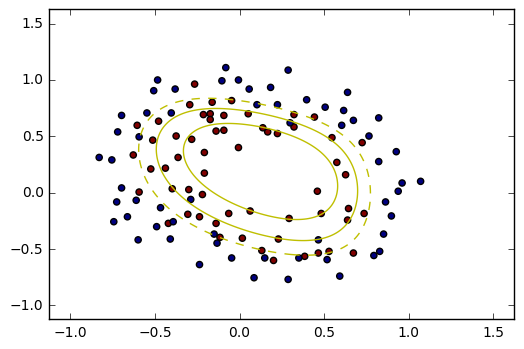

In [91]:
log_boundary_plot(10,features_df,target_df)

In [1]:
import os

In [2]:
os.getcwd()

'D:\\SwirebevUser\\tangj1\\Documents\\ML\\ML Excersices'